1. Differential Motion Analysis

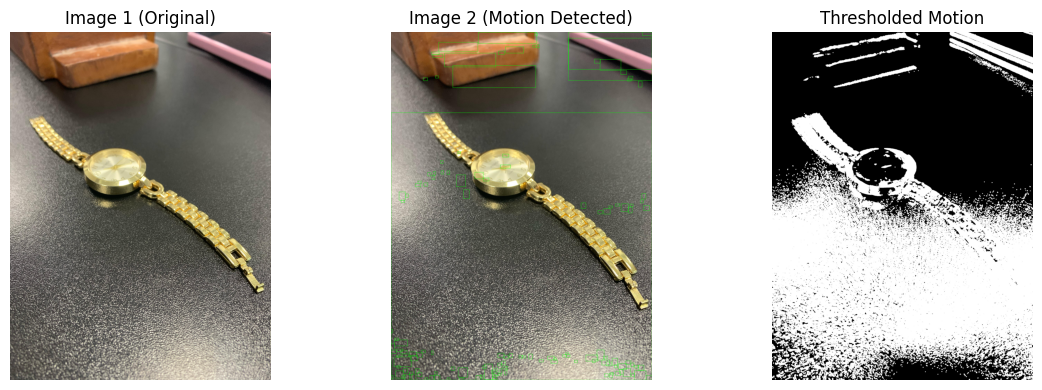

Motion detected!


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_motion(image1_path, image2_path, threshold_value=50, min_area=500):
    # Load the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if the images were loaded properly
    if img1 is None or img2 is None:
        print("Error: One of the images didn't load properly.")
        return None

    # Convert the images to grayscale for easier computation
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the two grayscale images
    diff = cv2.absdiff(gray1, gray2)

    # Apply a binary threshold to get the regions with significant differences
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Dilate the thresholded image to fill in gaps, making contours easier to detect
    kernel = np.ones((5, 5), np.uint8)
    thresh = cv2.dilate(thresh, kernel, iterations=2)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    motion_detected = False

    # Loop over the contours and draw bounding boxes for detected motion
    for contour in contours:
        if cv2.contourArea(contour) < min_area:
            continue  # Skip small changes/noise

        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        motion_detected = True

    # Convert images from BGR (OpenCV format) to RGB (Matplotlib format)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot the images using Matplotlib
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img1_rgb)
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(img2_rgb)
    plt.title("Image 2 (Motion Detected)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Motion")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    return motion_detected

if __name__ == "__main__":
    # Replace with the correct image paths in your directory
    image1_path = "Images/Normal_1.jpg"
    image2_path = "Images/Normal_2.jpg"

    motion = detect_motion(image1_path, image2_path)
    if motion:
        print("Motion detected!")
    else:
        print("No significant motion detected.")
